In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df=pd.DataFrame(titanic)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

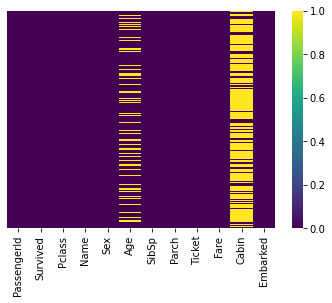

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:xlabel='Survived', ylabel='count'>

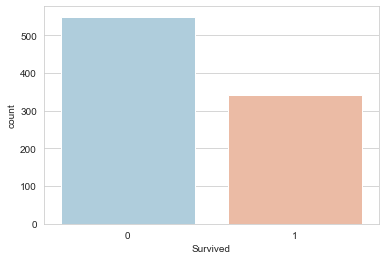

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df ,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

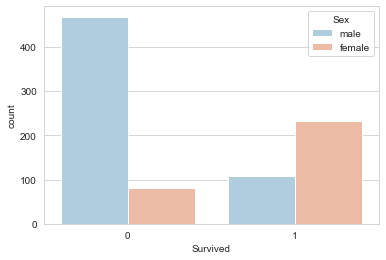

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=df, palette='RdBu_r')

around 100 women died and approximately 500 men died

around 100 men survived and approximately 250 women survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

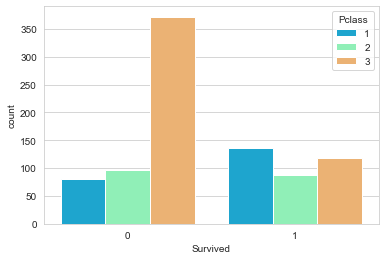

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

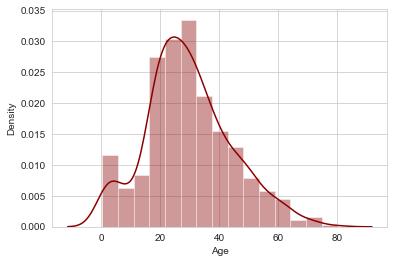

In [10]:
sns.distplot(df['Age'].dropna(), kde=True, color='darkred', bins=15)


<AxesSubplot:>

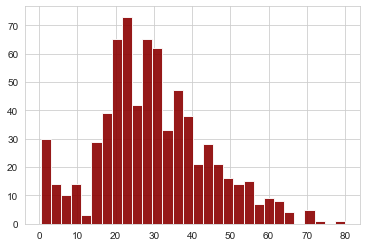

In [11]:
df['Age'].hist(bins=30, color='darkred', alpha=0.9)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

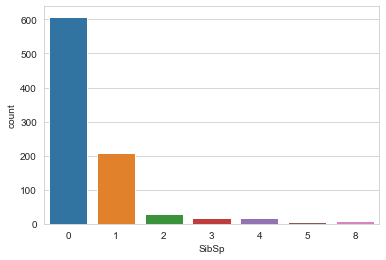

In [12]:
sns.countplot(x='SibSp',data=df)

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

# Data Cleaning


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

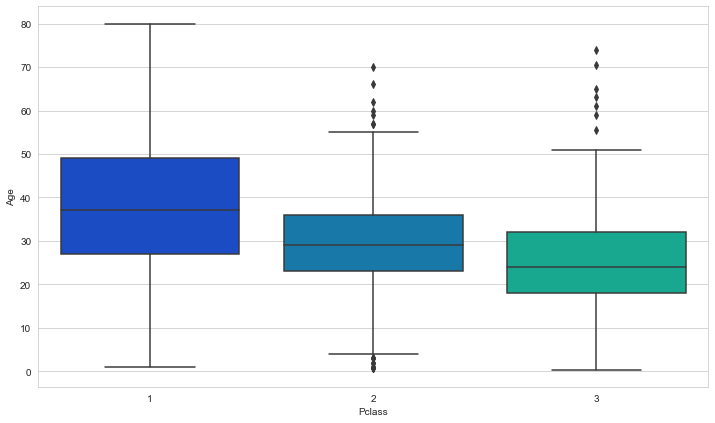

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [16]:
df['Age'].mean()

29.69911764705882

In [17]:
def impute_age(cols):
    """
    A function that takes a two column dataframe as input, if the age value is null then returns a value based on the persons passenger class.
    
    Note: Assumes that Age is the first column and PClass the second.
    """
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        # First class on average has the oldest passengers
        if Pclass == 1:
            return 37
        # Avg age of 2nd class passengers
        elif Pclass == 2:
            return 29
        # Avg age of 3rd class passengers
        else:
            return 24
    else:
        return Age

In [18]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)


<AxesSubplot:>

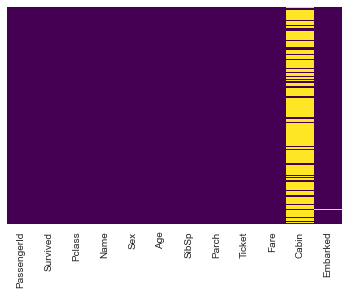

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [20]:
# Dropping the 'Cabin' column from our training dataframe
df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

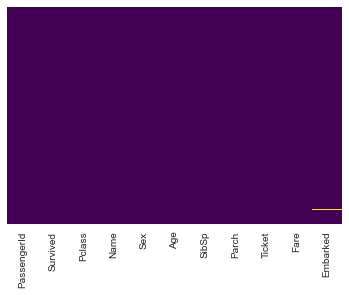

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# Dropping the few rows where we have null values
df.dropna(inplace=True)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [27]:
df.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'], axis=1, inplace=True)

In [28]:
df = pd.concat([df, sex, embark], axis=1)


In [29]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=df.drop('Survived',axis=1)

In [32]:
y=df['Survived']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# Initializing with 'solver' parameter
logmodel = LogisticRegression(solver='liblinear')
# Training the model
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report


In [38]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [39]:
from sklearn.metrics import confusion_matrix


In [40]:
c_mat = pd.DataFrame(confusion_matrix(y_test, predictions))
c_mat

,0,1
0,148,15
1,36,68
